In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial as spatial
import itertools

In [2]:
data = np.loadtxt("../../Downloads/TracingTheCosmicWeb_PublicData/fof_catalog_200Mpc512.txt", skiprows=3)
n_p = len(data)
print(n_p)
data = data[:n_p,[1,2,3]]

281465


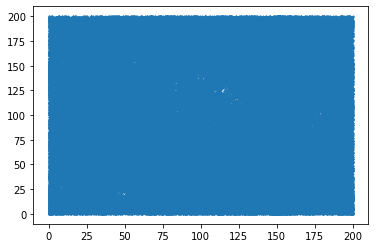

In [3]:
plt.scatter(data[:,0], data[:,1], s=1.0)

In [4]:
n_r = np.shape(data)[0]
data_random = np.random.random(size=(n_r,3))*200
points = np.vstack([data, data_random])
np.shape(points)

(562930, 3)

In [5]:
data

array([[141.6838, 168.7701,  18.8034],
       [ 45.7796, 172.4404, 159.1376],
       [ 27.5096, 160.0697, 140.5773],
       ...,
       [ 34.7056, 183.9671, 105.3986],
       [ 34.4005, 185.3278, 103.5761],
       [198.8885, 152.8262, 123.7985]])

In [6]:
tri = spatial.Delaunay(points)

In [7]:
len(tri.simplices)

3757607

In [8]:
tri.simplices

array([[396640, 398333,  26065, 440422],
       [112337,  53919, 436428, 490420],
       [164946, 204262, 450046, 404309],
       ...,
       [101488, 191694, 526083, 513629],
       [101488, 534787,  79380, 165345],
       [101488, 191694,  79380, 165345]], dtype=int32)

In [9]:
all_pairs = []
for simplex in tri.simplices:
    a = list(itertools.combinations(simplex,2))
    l = list(map(list, a))
    l = list(map(np.sort, l))
    l = list(map(list, l))
    all_pairs.append(l)
all_pairs = np.vstack(all_pairs)
unique_pairs = np.unique(all_pairs, axis=0)

In [10]:
len(all_pairs), len(unique_pairs)

(22545642, 4320816)

In [11]:
n_to_random = np.zeros(n_p+n_r)
n_to_data = np.zeros(n_p+n_r)

for p in unique_pairs:
    a = p[0]
    b = p[1]
    a_is_data = True
    b_is_data = True
    if a>n_p:
        a_is_data = False
    if b>n_p:
        b_is_data = False
        
    if a_is_data:
        n_to_data[b] +=1 
    else:
        n_to_random[b] +=1
    
    if b_is_data:
        n_to_data[a] +=1 
    else:
        n_to_random[a] +=1

In [35]:
is_data = np.arange(n_p+n_r) < n_p
is_random = ~is_data

min_connection = 4
more_random_than_data = n_to_random>n_to_data
low_random_connections = n_to_random<min_connection
low_data_connections = n_to_data<min_connection

is_void = (low_data_connections) & (more_random_than_data)
is_peak = (low_random_connections) & (~more_random_than_data)
is_filament = (~low_random_connections) & (~more_random_than_data)
is_sheet = (~low_data_connections) & (more_random_than_data)

print(
np.count_nonzero(is_void & is_random)/np.count_nonzero(is_random),
np.count_nonzero(is_peak & is_random)/np.count_nonzero(is_random),
np.count_nonzero(is_filament & is_random)/np.count_nonzero(is_random),
np.count_nonzero(is_sheet & is_random)/np.count_nonzero(is_random))

0.3213578952978168 0.03180502016236477 0.24395217877888903 0.40288490576092945


(0.0, 5.0)

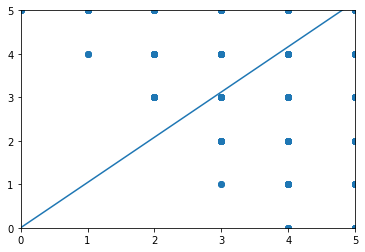

In [36]:
plt.scatter(n_to_data, n_to_random)
plt.plot(np.linspace(0,25,25))
plt.xlim([0,5])
plt.ylim([0,5])

[-6.  3. 10.]
all 7.406904774087037 -1.2363881832554668
data 5.965260213037721 2.295969303465795
random 7.013205289134518 -4.768745669976729


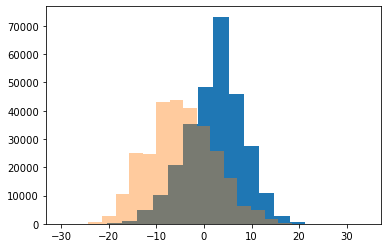

In [37]:
a=n_to_data-n_to_random
print(np.percentile(a[:n_p], [10,50,90]))
plt.hist(a[:n_p], bins=20)
plt.hist(a[n_p:], alpha=0.4, bins=20)
print('all', np.std(a),np.mean(a))
print('data', np.std(a[:n_p]),np.mean(a[:n_p]))
print('random', np.std(a[n_p:]),np.mean(a[n_p:]))

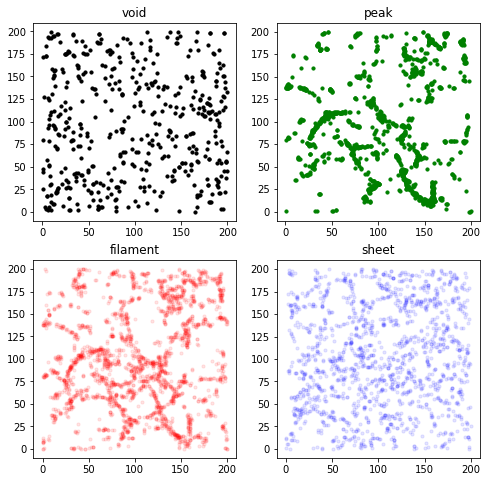

In [38]:
is_data = np.arange(n_p+n_r) < n_p
is_random = ~is_data
is_slice = (points[:,2]>100) & (points[:,2]<105)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.scatter(points[is_data&is_void&is_slice,0], points[is_data&is_void&is_slice,1], color='black', s=10)
plt.title('void')

plt.subplot(2,2,2)
plt.scatter(points[is_data&is_peak&is_slice,0], points[is_data&is_peak&is_slice,1], color='green', s=10)
plt.title('peak')

plt.subplot(2,2,3)
plt.scatter(points[is_data&is_filament&is_slice,0], points[is_data&is_filament&is_slice,1], color='red', s=10, alpha=0.1)
plt.title('filament')

plt.subplot(2,2,4)
plt.title('sheet')
plt.scatter(points[is_data&is_sheet&is_slice,0], points[is_data&is_sheet&is_slice,1], color='blue', s=10, alpha=0.1)

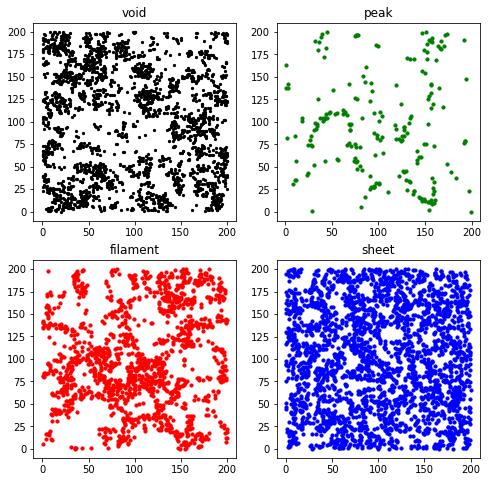

In [39]:
is_data = np.arange(n_p+n_r) < n_p
is_random = ~is_data

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.scatter(points[is_random&is_void&is_slice,0], points[is_random&is_void&is_slice,1], color='black', s=5)
plt.title('void')

plt.subplot(2,2,2)
plt.scatter(points[is_random&is_peak&is_slice,0], points[is_random&is_peak&is_slice,1], color='green', s=10)
plt.title('peak')

plt.subplot(2,2,3)
plt.scatter(points[is_random&is_filament&is_slice,0], points[is_random&is_filament&is_slice,1], color='red', s=10)
plt.title('filament')

plt.subplot(2,2,4)
plt.title('sheet')
plt.scatter(points[is_random&is_sheet&is_slice,0], points[is_random&is_sheet&is_slice,1], color='blue', s=10)

In [40]:
a=n_to_data-n_to_random

n_points = 15
diff_values = np.arange(n_points)
void_vff = np.ones(n_points)
peak_vff = np.ones(n_points)
filament_vff = np.ones(n_points)
sheet_vff = np.ones(n_points)


is_data = np.arange(n_p+n_r) < n_p
is_random = ~is_data

for i, limit in enumerate(diff_values):
    
    min_connection = diff_values[i]
    more_random_than_data = n_to_random>n_to_data
    low_random_connections = n_to_random<min_connection
    low_data_connections = n_to_data<min_connection

    is_void = (low_data_connections) & (more_random_than_data)
    is_peak = (low_random_connections) & (~more_random_than_data)
    is_filament = (~low_random_connections) & (~more_random_than_data)
    is_sheet = (~low_data_connections) & (more_random_than_data)

    
    void_vff[i] = np.count_nonzero(is_void & is_random)/np.count_nonzero(is_random)
    peak_vff[i] = np.count_nonzero(is_peak & is_random)/np.count_nonzero(is_random)
    filament_vff[i] = np.count_nonzero(is_filament & is_random)/np.count_nonzero(is_random)
    sheet_vff[i] = np.count_nonzero(is_sheet & is_random)/np.count_nonzero(is_random)

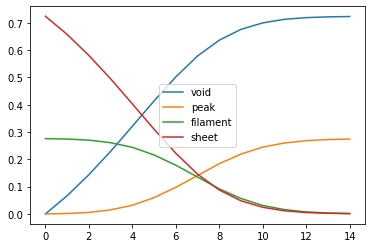

In [41]:
plt.plot(diff_values, void_vff, label='void')
plt.plot(diff_values, peak_vff, label='peak')
plt.plot(diff_values, filament_vff, label='filament')
plt.plot(diff_values, sheet_vff, label='sheet')
plt.legend()
#plt.semilogy()